# REGRESSION with KNN

### Agenda

* Business Understanding
* Data Understanding
* Data Preparation
* Exploratory Data Analysis
* Building a Decision Tree Model
* Evaluation

### Business Understanding

#### Problem Statement

A large child education toy company which sells edutainment tablets and gaming systems
both online and in retail stores wanted to analyze the customer data. They are operating
from last few years and maintaining all transactional information data. The given data
‘CustomerData.csv’ is a sample of customer level data extracted and processed for the
analysis from various set of transactional files.

The objectives of today’s activity are :
* Building a regression model to predict the customer revenue based on other factors and understand the influence of other attributes on revenue

### Identify right Error Metrics

##### Error Metrics for Regression

* Mean Absolute Error (MAE):

$$MAE = \dfrac{1}{n}\times\sum_{i = 1}^{n}|y_{i} - \hat{y_{i}}|$$


* Mean Squared Error (MSE):

$$MSE = \dfrac{1}{n}\times\sum_{i = 1}^{n}(y_{i} - \hat{y_{i}})^2$$


* Root Mean Squared Error (RMSE):

$$RMSE = \sqrt{\dfrac{1}{n}\times\sum_{i = 1}^{n}(y_{i} - \hat{y_{i}})^2}$$


* Mean Absolute Percentage Error (MAPE):

$$MAPE = \dfrac{100}{n}\times\mid\dfrac{\sum_{i = 1}^{n}y_{i} - \hat{y_{i}}}{y_{i}}\mid$$



### Loading the required libraries

In [1]:
import math

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### Loading the data

In [2]:
data = 

pandas.core.frame.DataFrame

### Data Understanding

(3209, 14)

#### Display the columns

Index(['CustomerID', 'City', 'NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild',
       'Tenure', 'FrequencyOfPurchase', 'NoOfUnitsPurchased',
       'FrequencyOFPlay', 'NoOfGamesPlayed', 'NoOfGamesBought',
       'FavoriteChannelOfTransaction', 'FavoriteGame',
       'TotalRevenueGenerated'],
      dtype='object')

RangeIndex(start=0, stop=3209, step=1)

#### See the top rows of the data

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrequencyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


#### Summary Statistics using describe()

Descriptive or Summary Statistic of the numeric columns

    It excludes categorical columns and calculate summary statistics only for numeric columns

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrequencyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated
count,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000
mean,2605.000000,1.114054,2.128389,4.960735,7.990651,347.520411,16.269554,14.684014,1568.207853,93.627921,14.761608,168.477183
std,926.502833,0.317927,1.035092,3.714191,8.784084,90.520118,8.441670,7.182029,1810.630464,88.936372,8.773910,81.798528
min,1001.000000,1.000000,1.000000,0.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,100.000000
25%,1803.000000,1.000000,1.000000,4.000000,6.000000,301.000000,11.000000,10.000000,446.000000,37.000000,10.000000,116.640000
50%,2605.000000,1.000000,2.000000,5.000000,7.000000,368.000000,14.000000,13.000000,1029.000000,70.000000,14.000000,142.390000
75%,3407.000000,1.000000,3.000000,6.000000,8.000000,417.000000,19.000000,17.000000,2029.000000,119.000000,19.000000,191.250000
max,4209.000000,2.000000,11.000000,113.000000,113.000000,472.000000,119.000000,112.000000,27829.000000,1166.000000,115.000000,990.560000


Summary statistics of the character columns

,FavoriteChannelOfTransaction,FavoriteGame
count,3209,3209
unique,2,2
top,Favorite,Uniform
freq,2637,3083


Uniform     3083
Favorite     126
Name: FavoriteGame, dtype: int64

Summary statistics of all the columns

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrequencyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
count,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209,3209,3209.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Favorite,Uniform,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2637,3083,NaN
mean,2605.000000,1.114054,2.128389,4.960735,7.990651,347.520411,16.269554,14.684014,1568.207853,93.627921,14.761608,NaN,NaN,168.477183
std,926.502833,0.317927,1.035092,3.714191,8.784084,90.520118,8.441670,7.182029,1810.630464,88.936372,8.773910,NaN,NaN,81.798528
min,1001.000000,1.000000,1.000000,0.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,100.000000
25%,1803.000000,1.000000,1.000000,4.000000,6.000000,301.000000,11.000000,10.000000,446.000000,37.000000,10.000000,NaN,NaN,116.640000
50%,2605.000000,1.000000,2.000000,5.000000,7.000000,368.000000,14.000000,13.000000,1029.000000,70.000000,14.000000,NaN,NaN,142.390000
75%,3407.000000,1.000000,3.000000,6.000000,8.000000,417.000000,19.000000,17.000000,2029.000000,119.000000,19.000000,NaN,NaN,191.250000


#### Data type of each of the variable

CustomerID                        int64
City                              int64
NoOfChildren                      int64
MinAgeOfChild                     int64
MaxAgeOfChild                     int64
Tenure                            int64
FrequencyOfPurchase               int64
NoOfUnitsPurchased                int64
FrequencyOFPlay                   int64
NoOfGamesPlayed                   int64
NoOfGamesBought                   int64
FavoriteChannelOfTransaction     object
FavoriteGame                     object
TotalRevenueGenerated           float64
dtype: object

### Data Preparation

#### Observations:
    1. City is interpreted as numeric (which is actually categorical) and FavouriteGame, FavouriteChannelOfTransaction are interpreted as objects.
    2. max age of children is 113 which must be a wrong entry
    3. Summary statistics for CustomerID is not meaningful

So we now change these appropriately i.e, convert city, favourite game and favourite channel to category, exclude customer id from the data for analysis and treat wrong entry records

#### Check and delete CustomerID attribute

In [15]:
data.drop('CustomerID', axis=1, inplace=True)

#### Data type conversion 
    Using astype('category') convert 'City', 'FavoriteChannelOfTransaction', 'FavoriteGame' attributes to a categorical data type.

In [16]:
for col in ['City', 'FavoriteChannelOfTransaction', 'FavoriteGame']:
    data[col] = data[col].astype('category')

City                            category
NoOfChildren                       int64
MinAgeOfChild                      int64
MaxAgeOfChild                      int64
Tenure                             int64
FrequencyOfPurchase                int64
NoOfUnitsPurchased                 int64
FrequencyOFPlay                    int64
NoOfGamesPlayed                    int64
NoOfGamesBought                    int64
FavoriteChannelOfTransaction    category
FavoriteGame                    category
TotalRevenueGenerated            float64
dtype: object

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrequencyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
count,3209.0,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209,3209,3209.000000
unique,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN
top,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Favorite,Uniform,NaN
freq,2843.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2637,3083,NaN
mean,NaN,2.128389,4.960735,7.990651,347.520411,16.269554,14.684014,1568.207853,93.627921,14.761608,NaN,NaN,168.477183
std,NaN,1.035092,3.714191,8.784084,90.520118,8.441670,7.182029,1810.630464,88.936372,8.773910,NaN,NaN,81.798528
min,NaN,1.000000,0.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,100.000000
25%,NaN,1.000000,4.000000,6.000000,301.000000,11.000000,10.000000,446.000000,37.000000,10.000000,NaN,NaN,116.640000
50%,NaN,2.000000,5.000000,7.000000,368.000000,14.000000,13.000000,1029.000000,70.000000,14.000000,NaN,NaN,142.390000
75%,NaN,3.000000,6.000000,8.000000,417.000000,19.000000,17.000000,2029.000000,119.000000,19.000000,NaN,NaN,191.250000


Observe how many records have values 113 as age of the children

In [19]:
data.loc[(data['MinAgeOfChild']==113) | (data['MaxAgeOfChild']==113),] #Only colon after comma implies consider all the rows

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrequencyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
570,1,2,4,113,205,17,17,158,51,8,Favorite,Uniform,218.85
584,1,2,3,113,379,6,6,242,32,0,Favorite,Uniform,100.44
599,1,2,113,113,436,26,26,10502,562,26,Favorite,Uniform,300.00
804,1,3,6,113,286,6,6,2137,72,6,Favorite,Uniform,102.50
878,1,2,5,113,202,9,8,483,68,9,Favorite,Uniform,105.00
897,1,2,5,113,355,16,16,1700,142,10,Favorite,Uniform,270.00
1097,1,3,6,113,432,12,12,2261,194,12,Favorite,Uniform,160.00
1144,1,3,5,113,405,16,14,4438,130,16,Uniform,Uniform,117.50
1413,1,3,4,113,171,15,11,1728,41,15,Favorite,Uniform,107.50
1621,1,2,6,113,187,10,9,731,39,10,Uniform,Uniform,115.00


(3209, 13)


#### Removing outliers

    Ignore records with age as 113

In [21]:
data=data.loc[(data['MinAgeOfChild'] !=113) & (data['MaxAgeOfChild']!=113),:] 

(3189, 13)


#### Missing Data

    pandas primarily uses the value np.nan to represent missing data. 

Check for missing value

    is.null() output boolean i.e. if missing value then true else false. 

    sum function counts 'true' thus gives total number of missing values

City                            0
NoOfChildren                    0
MinAgeOfChild                   0
MaxAgeOfChild                   0
Tenure                          0
FrequencyOfPurchase             0
NoOfUnitsPurchased              0
FrequencyOFPlay                 0
NoOfGamesPlayed                 0
NoOfGamesBought                 0
FavoriteChannelOfTransaction    0
FavoriteGame                    0
TotalRevenueGenerated           0
dtype: int64

In this case there are no missing values. However if we find any missing values in the data, as a rule of thumb


    If the particular row/column has more number of missing values then drop that particular rows/column 
    
        e.g. To drop any rows that have missing data use data.dropna(axis=0, inplace=True) 
        
    Otherwise, impute/fill missing data based on domain knowledge or using imputation techniques
        
        e.g. To fill missing values with mean use data.fillna(data.mean(), inplace=True)      

City                            category
NoOfChildren                       int64
MinAgeOfChild                      int64
MaxAgeOfChild                      int64
Tenure                             int64
FrequencyOfPurchase                int64
NoOfUnitsPurchased                 int64
FrequencyOFPlay                    int64
NoOfGamesPlayed                    int64
NoOfGamesBought                    int64
FavoriteChannelOfTransaction    category
FavoriteGame                    category
TotalRevenueGenerated            float64
dtype: object

#### Correlation between numeric attributes 

In [25]:
num_attr = data.select_dtypes(include=['int64', 'float64']).columns
num_attr

Index(['NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild', 'Tenure',
       'FrequencyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'TotalRevenueGenerated'],
      dtype='object')

In [26]:
corr=data[num_attr].corr()

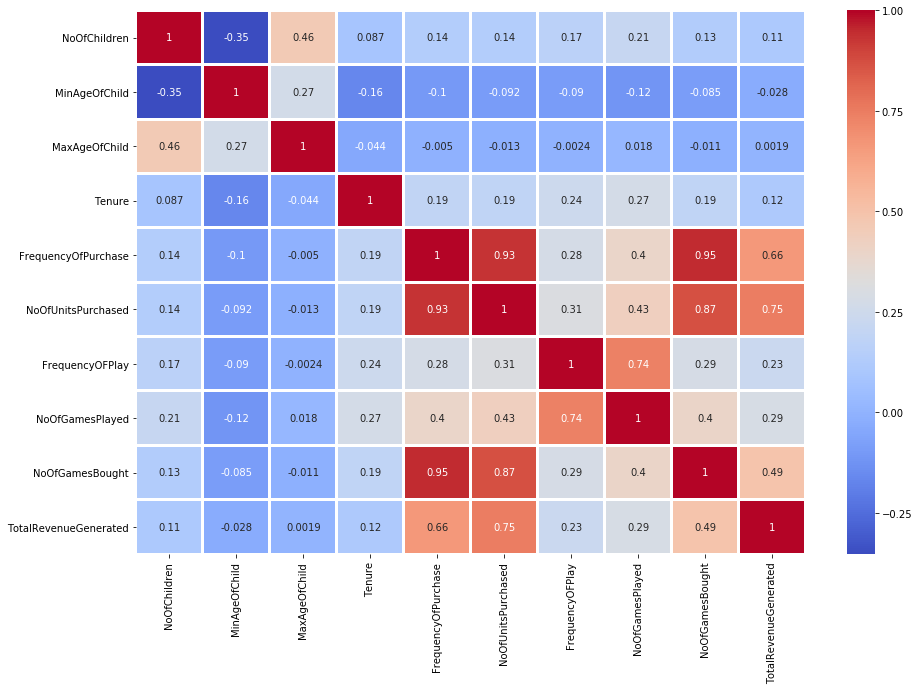

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(corr,cmap='coolwarm',ax=ax,annot=True,linewidths=2)

#### Converting Categorical to Numeric 
    
Use __pandas.get_dummies__ to convert convert categorical variable into dummy/indicator variables

#### Creating dummy variables.
    
    If we have k levels in a category, then we create k-1 dummy variables as the last one would be redundant. So we use the parameter drop_first in pd.get_dummies function that drops the first level in each of the category

In [28]:
cols_to_transform = data.select_dtypes(include=['category']).columns

In [29]:
data = pd.get_dummies(columns=cols_to_transform, data=data, prefix=cols_to_transform, prefix_sep="_", drop_first=True)

In [30]:
print (data.columns)    

Index(['NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild', 'Tenure',
       'FrequencyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'TotalRevenueGenerated', 'City_2',
       'FavoriteChannelOfTransaction_Uniform', 'FavoriteGame_Uniform'],
      dtype='object')


In [31]:
data.head(3)

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrequencyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated,City_2,FavoriteChannelOfTransaction_Uniform,FavoriteGame_Uniform
0,2,3,8,210,11,11,2344,108,10,107.51,0,1,1
1,2,3,6,442,20,20,245,22,7,382.40,0,0,1
2,4,3,5,424,18,18,1059,130,18,135.01,0,0,1


####  Split the data into train and test: 

sklearn.model_selection.train_test_split
    
    Split arrays or matrices into random train and test subsets

In [32]:
X, y = data.loc[:,data.columns!='TotalRevenueGenerated'], data.loc[:,'TotalRevenueGenerated']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) 

In [33]:
print (type(X_train))
print (type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


#### Standardization of data

- In data it is not very uncommon to have variables with different scales. For eg: Age ranges from 0 to 100 and salary may be in thousands. 
    - Scaling by Normalization or min-max scaling
    - Scaling by Standardization i.e. using mean and standard deviation

1. StandardScaler is a function used to standardize the data .
2. Standardized value for x is computed as (x-mean(column))/standard deviation(column)). 

In [34]:
scale = StandardScaler()
scale.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
X_train_std = scale.transform(X_train)
X_test_std = scale.transform(X_test)

In [36]:
print(X_train.shape)
print(X_train.iloc[:2,])

(2232, 12)
      NoOfChildren  MinAgeOfChild  MaxAgeOfChild  Tenure  FrequencyOfPurchase  \
1866             3              6              6     346                   18   
1002             2              5              8     292                   19   

      NoOfUnitsPurchased  FrequencyOFPlay  NoOfGamesPlayed  NoOfGamesBought  \
1866                  16             2930              150                9   
1002                  13              658               52               19   

      City_2  FavoriteChannelOfTransaction_Uniform  FavoriteGame_Uniform  
1866       0                                     0                     1  
1002       0                                     0                     1  


## Building a K Nearest Neighbors Regression Model

In [37]:
knn = KNeighborsRegressor(n_neighbors=5)

In [38]:
knn.fit(X_train_std, y_train) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

###### Prediction

In [39]:
train_pred = knn.predict(X_train_std)
test_pred = knn.predict(X_test_std)

In [40]:
print("The Mean Absolute Error on train dataset: {} \n".format(mean_absolute_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Error on test dataset: {} \n".format(mean_absolute_error(y_pred=test_pred,y_true=y_test)))

print("The Mean Squared Error on train dataset: {} \n".format(mean_squared_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Squared Error on test dataset: {} \n".format(mean_squared_error(y_pred=test_pred,y_true=y_test)))

print("The Root Mean Squared Error on train dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=train_pred,y_true=y_train))))
print("The Root Mean Squared Error on test dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=test_pred,y_true=y_test))))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("The Mean Absolute Percentage Error on train dataset: {} \n".format(mean_absolute_percentage_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Percentage Error on test dataset: {} \n".format(mean_absolute_percentage_error(y_pred=test_pred,y_true=y_test)))


The Mean Absolute Error on train dataset: 29.712411290322585 

The Mean Absolute Error on test dataset: 38.40385579937305 

The Mean Squared Error on train dataset: 1890.3905185967742 

The Mean Squared Error on test dataset: 3711.9916857972835 

The Root Mean Squared Error on train dataset: 43.47862139715074 

The Root Mean Squared Error on test dataset: 60.92611661510426 

The Mean Absolute Percentage Error on train dataset: 16.91876166656746 

The Mean Absolute Percentage Error on test dataset: 21.01882484004985 



### -------------------------------------------------------------------------------------------------------------

# CLASSIFICATION with KNN

#### Problem

    Is to identify products at risk of backorder before the event occurs so the business has time to react. 

### What is a Backorder?
Backorders are products that are temporarily out of stock, but a customer is permitted to place an order against future inventory. 
A backorder generally indicates that customer demand for a product or service exceeds a company’s capacity to supply it. Back orders are both good and bad. Strong demand can drive back orders, but so can suboptimal planning. 

#### Data

Data file contains the historical data for the 8 weeks prior to the week we are trying to predict. The data was taken as weekly snapshots at the start of each week. Columns are defined as follows:

    sku - Random ID for the product

    national_inv - Current inventory level for the part

    lead_time - Transit time for product (if available)

    in_transit_qty - Amount of product in transit from source

    forecast_3_month - Forecast sales for the next 3 months

    forecast_6_month - Forecast sales for the next 6 months

    forecast_9_month - Forecast sales for the next 9 months

    sales_1_month - Sales quantity for the prior 1 month time period

    sales_3_month - Sales quantity for the prior 3 month time period

    sales_6_month - Sales quantity for the prior 6 month time period

    sales_9_month - Sales quantity for the prior 9 month time period

    min_bank - Minimum recommend amount to stock

    potential_issue - Source issue for part identified

    pieces_past_due - Parts overdue from source

    perf_6_month_avg - Source performance for prior 6 month period

    perf_12_month_avg - Source performance for prior 12 month period

    local_bo_qty - Amount of stock orders overdue

    deck_risk - Part risk flag

    oe_constraint - Part risk flag

    ppap_risk - Part risk flag

    stop_auto_buy - Part risk flag

    rev_stop - Part risk flag

    went_on_backorder - Product actually went on backorder. This is the target value.
    
         Yes or 1 : Product backordered

         No or 0  : Product not backordered

#### Identify Right Error Metrics

    Based on the business have to identify right error metrics.

#### Loading the data

In [41]:
data = pd.read_csv("BackOrders.csv",header=0)

#### Understand the Data

See the No. row and columns

In [42]:
data.shape

(61589, 23)

Display the columns

In [43]:
data.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

Display the index

In [44]:
data.index

RangeIndex(start=0, stop=61589, step=1)

See the top rows of the data

In [45]:
data[:3]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,...,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1,1870557,7,2.0,0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.0,10,10,77,184,46,132,256,...,0,0.54,0.70,0,No,No,No,Yes,No,No


Shows a quick statistic summary of your data using describe

In [46]:
data.describe(include='all')

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,6.158900e+04,61589.000000,58186.000000,61589.000000,6.158900e+04,6.158900e+04,6.158900e+04,61589.000000,61589.000000,6.158900e+04,...,61589.000000,61589.000000,61589.000000,61589.000000,61589,61589,61589,61589,61589,61589
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,No,No,Yes,No,No
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,48145,61577,53792,59303,61569,50296
mean,2.037188e+06,287.721882,7.559619,30.192843,1.692728e+02,3.150413e+02,4.535760e+02,44.742957,150.732631,2.835465e+02,...,1.605400,-6.264182,-5.863664,1.205361,NaN,NaN,NaN,NaN,NaN,NaN
std,6.564178e+05,4233.906931,6.498952,792.869253,5.286742e+03,9.774362e+03,1.420201e+04,1373.805831,5224.959649,8.872270e+03,...,42.309229,25.537906,24.844514,29.981155,NaN,NaN,NaN,NaN,NaN,NaN
min,1.068628e+06,-2999.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,-99.000000,-99.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.498574e+06,3.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.620000,0.640000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.898033e+06,10.000000,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000,4.000000e+00,...,0.000000,0.820000,0.800000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.314826e+06,57.000000,8.000000,0.000000,1.200000e+01,2.500000e+01,3.600000e+01,6.000000,17.000000,3.400000e+01,...,0.000000,0.960000,0.950000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


Display data type of each variable

In [47]:
data.dtypes

sku                    int64
national_inv           int64
lead_time            float64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue       object
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

#### Observations

    sku is Categorical but is interpreted as int64 
    potential_issue, deck_risk, oe_constraint, ppap_risk, stop_auto_buy, rev_stop, and went_on_backorder are also categorical but is interpreted as object. 

#### Convert all the attributes to appropriate type

Data type conversion

    Using astype('category') to convert potential_issue, deck_risk, oe_constraint, ppap_risk, stop_auto_buy, rev_stop, and went_on_backorder attributes to categorical attributes.


In [48]:
for col in ['sku', 'potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']:
    data[col] = data[col].astype('category')

Display data type of each variable

In [49]:
data.dtypes

sku                  category
national_inv            int64
lead_time             float64
in_transit_qty          int64
forecast_3_month        int64
forecast_6_month        int64
forecast_9_month        int64
sales_1_month           int64
sales_3_month           int64
sales_6_month           int64
sales_9_month           int64
min_bank                int64
potential_issue      category
pieces_past_due         int64
perf_6_month_avg      float64
perf_12_month_avg     float64
local_bo_qty            int64
deck_risk            category
oe_constraint        category
ppap_risk            category
stop_auto_buy        category
rev_stop             category
went_on_backorder    category
dtype: object

#### Delete sku attribute

In [50]:
np.size(np.unique(data.sku, return_counts=True)[0])

61589

In [51]:
data.drop('sku', axis=1, inplace=True)

#### Missing Data

    Missing value analysis and dropping the records with missing values

In [52]:
data.isnull().sum()

national_inv            0
lead_time            3403
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

Observing the number of records before and after missing value records removal

In [53]:
print (data.shape)

(61589, 22)


In [54]:
#Since the number of missing values is about 5%. For initial analysis we ignore all these records
data = data.dropna(axis=0)

In [55]:
print(data.isnull().sum())
print(data.shape)

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64
(58186, 22)


#### Converting Categorical to Numeric

For some of the models all the independent attribute should be of type numeric and Linear Regression model is one among them.
But this data set has some categorial attributes.

'pandas.get_dummies' To convert convert categorical variable into dummy/indicator variables


In [56]:
print (data.columns)

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')


Creating dummy variables.

    If we have k levels in a category, then we create k-1 dummy variables as the last one would be redundant. So we use the parameter drop_first in pd.get_dummies function that drops the first level in each of the category


In [57]:
categorical_Attributes = data.select_dtypes(include=['category']).columns

In [58]:
data = pd.get_dummies(columns=categorical_Attributes, data=data, prefix=categorical_Attributes, prefix_sep="_", drop_first=True)

In [59]:
print (data.columns, data.shape)

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty', 'potential_issue_Yes', 'deck_risk_Yes',
       'oe_constraint_Yes', 'ppap_risk_Yes', 'stop_auto_buy_Yes',
       'rev_stop_Yes', 'went_on_backorder_Yes'],
      dtype='object') (58186, 22)


#### Target attribute distribution

In [60]:
pd.value_counts(data['went_on_backorder_Yes'].values)

0    47217
1    10969
dtype: int64

#### Split the data in to train and test

sklearn.model_selection.train_test_split

    Split arrays or matrices into random train and test subsets

In [61]:
#Performing train test split on the data
X, y = data.loc[:,data.columns!='went_on_backorder_Yes'].values, data.loc[:,'went_on_backorder_Yes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


In [62]:
#To get the distribution in the target in train and test
print(pd.value_counts(y_train))
print(pd.value_counts(y_test))

0    33067
1     7663
dtype: int64
0    14150
1     3306
dtype: int64


In [63]:
scale = StandardScaler()
scale.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [64]:
X_train_std = scale.transform(X_train)
X_test_std = scale.transform(X_test)

#### KNN Classification

In [65]:
neighbors = 3

knn = KNeighborsClassifier(n_neighbors=neighbors)
model = knn.fit(X_train_std, y_train)

#### Predictions

In [ ]:
test_pred=model.predict(X_test_std)
train_pred=model.predict(X_train_std)

#### Getting evaluation metrics and evaluating model performance

In [ ]:
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

#### Calculate Accuracy, True Positive Rate and True Negative Rates

In [ ]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

In [ ]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)